🔎 Found 2 images in h:\내 드라이브\강의자료\Vibe_Coding\Plantar_Pressure\test_foot_data

--- Processing Image 1: 0_Original_Source.png_left_256.png ---


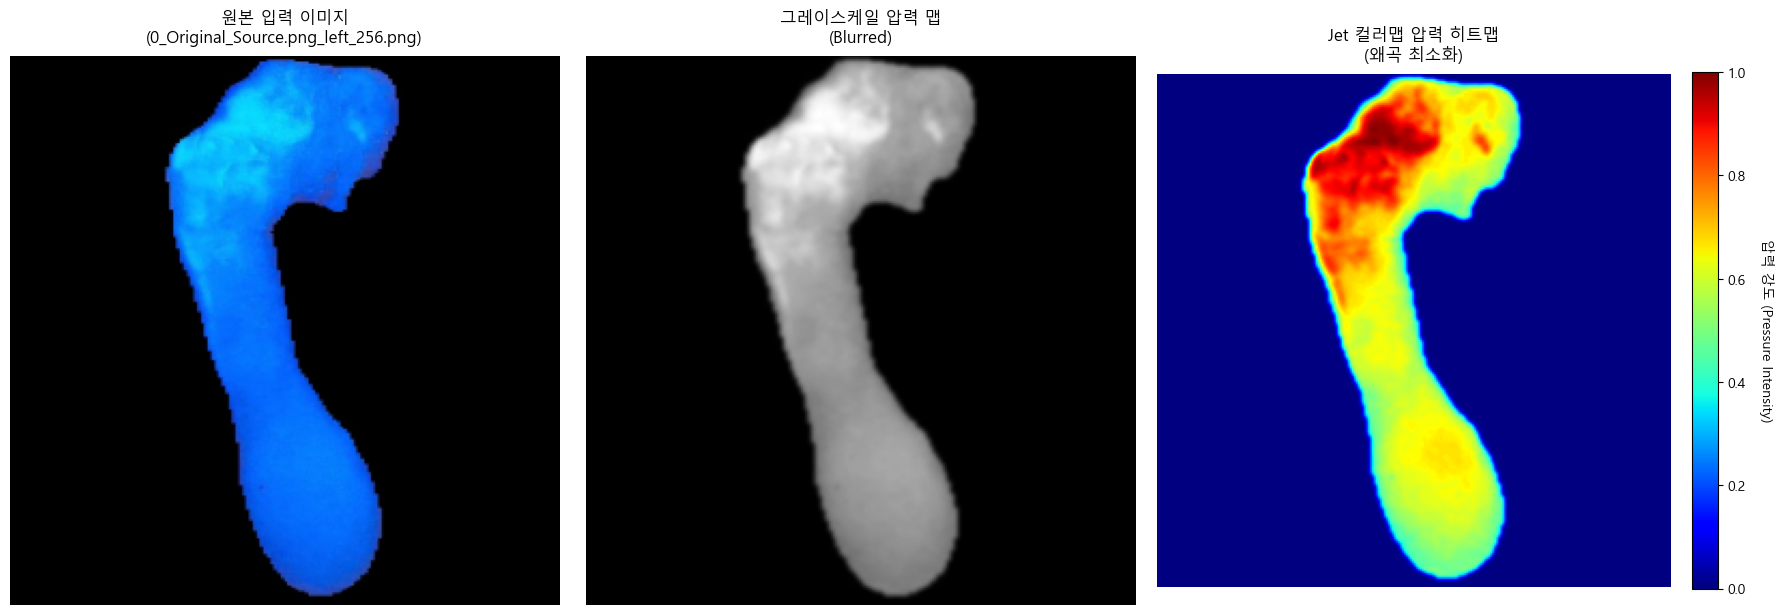

원본 Shape: (256, 256, 3)
압력 범위: 0.00 ~ 161.00
정규화 범위: 0.00 ~ 1.00
--------------------------------------------------

--- Processing Image 2: 0_Original_Source.png_right_256.png ---


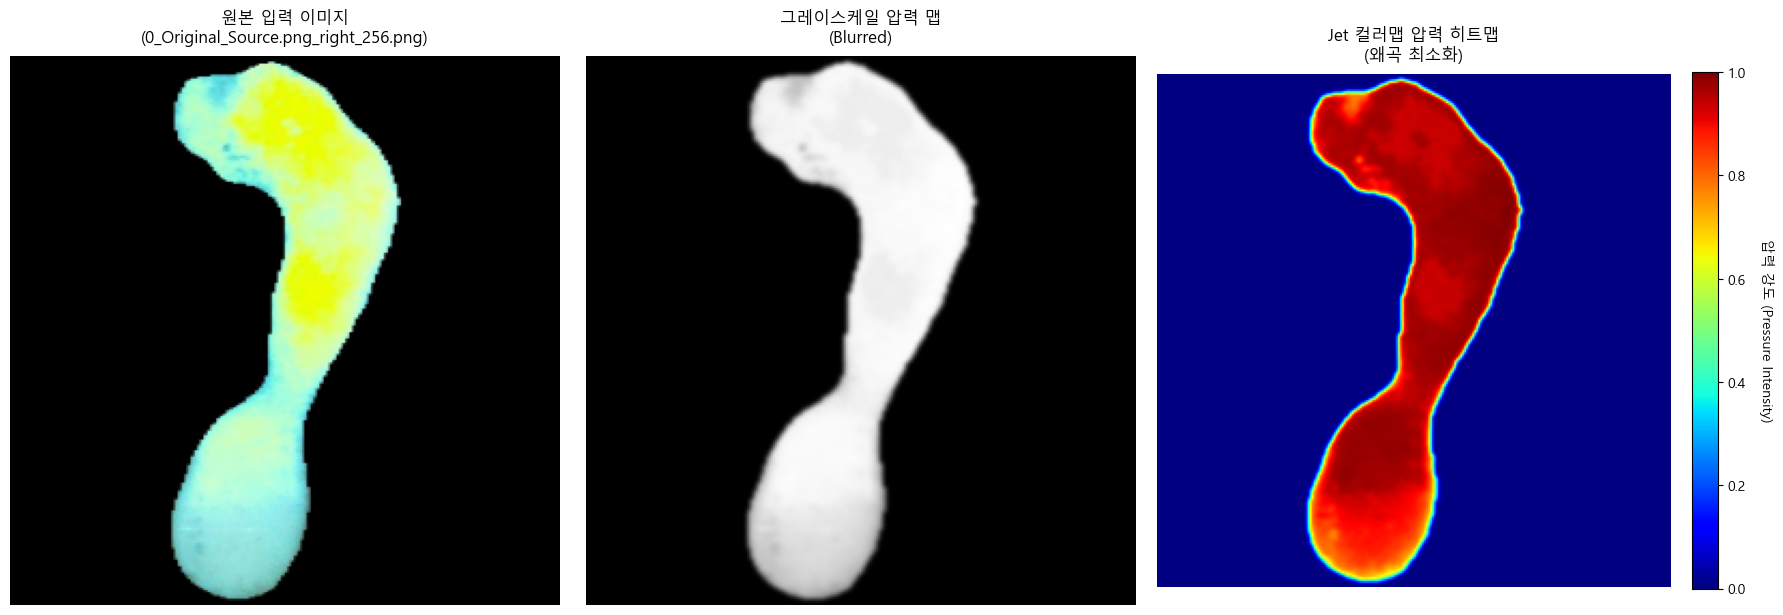

원본 Shape: (256, 256, 3)
압력 범위: 0.00 ~ 236.00
정규화 범위: 0.00 ~ 1.00
--------------------------------------------------



In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from PIL import Image
import os
import glob

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 이미지 디렉토리 절대 경로 생성
base_dir = os.path.abspath('')
data_dir = os.path.join(base_dir, 'test_foot_data')

# 디렉토리 존재 확인
if not os.path.isdir(data_dir):
    print(f"⚠️ Error: Directory not found: {data_dir}")
else:
    # 모든 png 파일 찾기
    image_files = glob.glob(os.path.join(data_dir, '*.png'))
    
    if not image_files:
        print(f"⚠️ No .png files found in {data_dir}")
    else:
        print(f"🔎 Found {len(image_files)} images in {data_dir}\n")
        
        for i, image_path in enumerate(image_files):
            filename = os.path.basename(image_path)
            print(f"--- Processing Image {i+1}: {filename} ---")
            
            # 이미지 로드 (Pillow → numpy 배열 → OpenCV BGR)
            try:
                pil_img = Image.open(image_path)
                original_image = np.array(pil_img)
                # Pillow gives RGB, convert to BGR for OpenCV consistency
                original_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR)
            except Exception as e:
                print(f"❌ Error: Could not load image {filename}")
                print(e)
                continue

            # 1) BGR → RGB 변환 (시각화용)
            original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            
            # 2) 그레이스케일 변환 (압력 맵 계산 기본값)
            gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
            
            # 3) Gaussian blur 적용 – 왜곡 최소화
            gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)
            
            # 4) 압력 맵 (float32) 및 정규화 (0‑1) – 왜곡 최소화
            pressure_map = gray_blur.astype(np.float32)
            pressure_normalized = (pressure_map - pressure_map.min()) / (pressure_map.max() - pressure_map.min())
            
            # 5) Jet colormap 적용
            pressure_uint8 = (pressure_normalized * 255).astype(np.uint8)
            heatmap_jet = cv2.applyColorMap(pressure_uint8, cv2.COLORMAP_JET)
            heatmap_rgb = cv2.cvtColor(heatmap_jet, cv2.COLOR_BGR2RGB)
            
            # 6) 결과 시각화 (원본, 그레이스케일, Jet 히트맵)
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            
            axes[0].imshow(original_rgb)
            axes[0].set_title(f'원본 입력 이미지\n({filename})', fontsize=12, pad=10)
            axes[0].axis('off')
            
            axes[1].imshow(gray_blur, cmap='gray')
            axes[1].set_title('그레이스케일 압력 맵\n(Blurred)', fontsize=12, pad=10)
            axes[1].axis('off')
            
            axes[2].imshow(heatmap_rgb)
            axes[2].set_title('Jet 컬러맵 압력 히트맵\n(왜곡 최소화)', fontsize=12, pad=10)
            axes[2].axis('off')
            
            # 컬러바 추가 (Jet 컬러맵)
            cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='jet'), ax=axes[2], fraction=0.046, pad=0.04)
            cbar.set_label('압력 강도 (Pressure Intensity)', rotation=270, labelpad=20)
            
            plt.tight_layout()
            plt.show()
            
            # 이미지 정보 출력
            print(f"원본 Shape: {original_image.shape}")
            print(f"압력 범위: {pressure_map.min():.2f} ~ {pressure_map.max():.2f}")
            print(f"정규화 범위: {pressure_normalized.min():.2f} ~ {pressure_normalized.max():.2f}")
            print("-" * 50 + "\n")

